<a href="https://colab.research.google.com/github/adexdams/ml-clustering-model/blob/main/Personal_Customer_Personality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **End-to-end Customer Personality Analysis Model**

Analysis of company's ideal customers.

# **End to end Clustering (Customer Segments) ML model**

By Adedamola Adediran

The model segments customers into groups that would inform the company's actions by helping them better understand the behaviour and needs of different types of customers.

The approach to delivering the model would be as follows:
1. Problem Definition
2. Data Exploration (EDA)
4. Feature Engineering
5. ML Modelling Experiments
6. Evaluation
7. Conculsion


## **Introduction**


### **Problem Definition**

The task is to develop a customer personality analysis that would help the retail business understand its customers and help in modifying the product based on its target from different types of customer segments.



### **About the Data**

This dataset contains information on customer purchase behavior across various attributes, aiming to help data scientists and analysts understand the factors influencing purchase decisions. The dataset includes demographic information, purchasing habits, and other relevant features.

It was sourced from **Kaggle**: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis



### **About the Features**

**People**
* **ID:** Customer's unique identifier
* **Year_Birth:** Customer's birth year
* **Education:** Customer's education level
* **Marital_Status:** Customer's marital status
* **Income:** Customer's yearly household income
* **Kidhome:** Number of children in customer's household
* **Teenhome:** Number of teenagers in customer's household
* **Dt_Customer:** Date of customer's enrollment with the company
* **Recency:** Number of days since customer's last purchase
* **Complain:** 1 if the customer complained in the last 2 years, 0 otherwise

**Products**
* **MntWines:** Amount spent on wine in last 2 years
* **MntFruits:** Amount spent on fruits in last 2 years
* **MntMeatProducts:** Amount spent on meat in last 2 years
* **MntFishProducts:** Amount spent on fish in last 2 years
* **MntSweetProducts:** Amount spent on sweets in last 2 years
* **MntGoldProds:** Amount spent on gold in last 2 years

**Promotion**
* **NumDealsPurchases:** Number of purchases made with a discount
* **AcceptedCmp1:** 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* **AcceptedCmp2:** 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* **AcceptedCmp3:** 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* **AcceptedCmp4:** 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* **AcceptedCmp5:** 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* **Response:** 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**
* **NumWebPurchases:** Number of purchases made through the company’s website
* **NumCatalogPurchases:** Number of purchases made using a catalogue
* **NumStorePurchases:** Number of purchases made directly in stores
* **NumWebVisitsMonth:** Number of visits to company’s website in the last month

**Target**
* Need to perform clustering to summarize customer segments.

## **Importing Libraries & Data Files**

In [1]:
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
#importing tech libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline

In [3]:
#loading the data file
mc_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/marketing_campaign.csv', sep='\t') # Specify the tab delimiter
mc_df.shape

(2240, 29)

In [4]:
mc_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
mc_df.shape

(2240, 29)

## **Exploratory Data Analysis (or EDA)**

This section should answer the following questions:
1. What are the data types of each column?

In [6]:
mc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
mc_df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [8]:
#Checking for null values
mc_df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
# Isolating the only null values
mc_df['Income'].isnull().sum()

24

In [10]:
# Replacing the null values with average annual income

mc_df['Income'].fillna(mc_df['Income'].mean(), inplace=True)

In [11]:
mc_df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

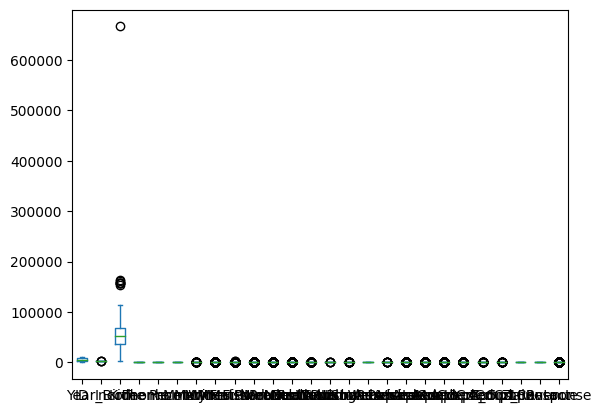

In [12]:
# Identifying the outlier values
mc_df.plot.box();

In [13]:
mc_df['Income'].max()

666666.0

In [14]:
# Removing outlier values
mc_df = mc_df.dropna()[mc_df['Income']< 600000]

In [15]:
mc_df.shape

(2239, 29)

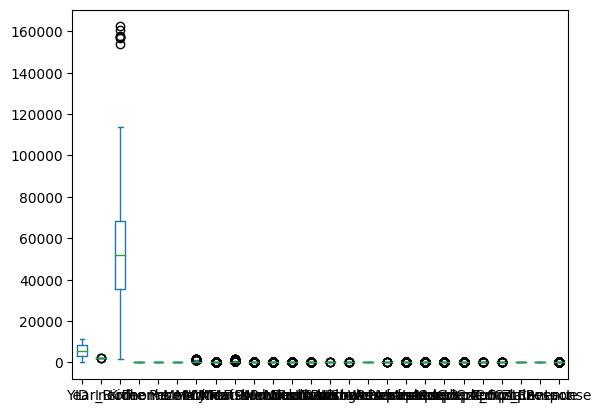

In [16]:
mc_df.plot.box();

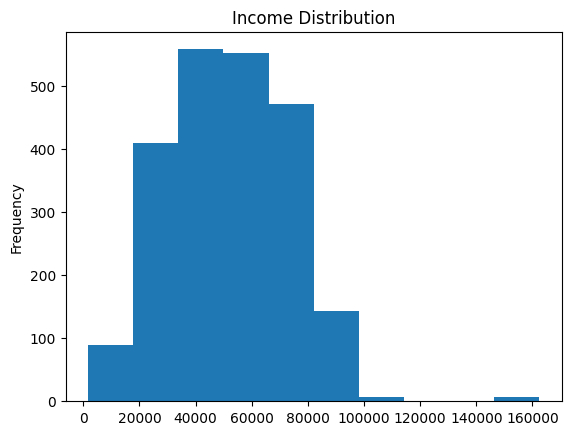

In [17]:
mc_df['Income'].plot.hist(title='Income Distribution');

We still have outlier values in the payroll of people earning over 160,000 in the dataset.

In [18]:
#Count the values with income over 150,000
mc_df[mc_df['Income'] > 100000].count()

ID                     12
Year_Birth             12
Education              12
Marital_Status         12
Income                 12
Kidhome                12
Teenhome               12
Dt_Customer            12
Recency                12
MntWines               12
MntFruits              12
MntMeatProducts        12
MntFishProducts        12
MntSweetProducts       12
MntGoldProds           12
NumDealsPurchases      12
NumWebPurchases        12
NumCatalogPurchases    12
NumStorePurchases      12
NumWebVisitsMonth      12
AcceptedCmp3           12
AcceptedCmp4           12
AcceptedCmp5           12
AcceptedCmp1           12
AcceptedCmp2           12
Complain               12
Z_CostContact          12
Z_Revenue              12
Response               12
dtype: int64

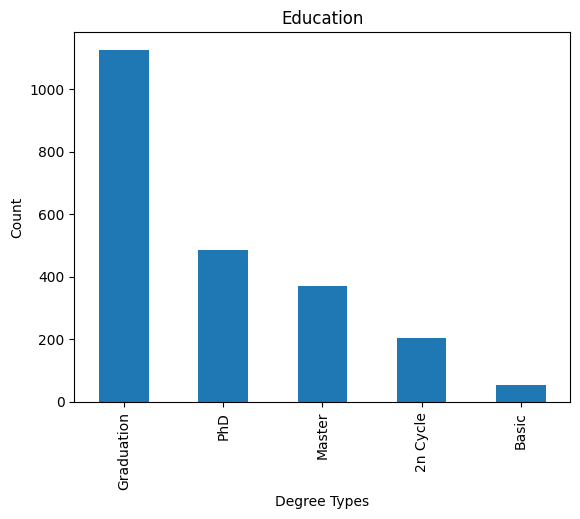

In [19]:
#Plot a bar chart of the education column
mc_df['Education'].value_counts().plot.bar(title='Education', xlabel='Degree Types', ylabel='Count');

## **Feature Engineering**

In [20]:
mc_df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [21]:
mc_df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0


In [22]:
#Isolating and converting datetime columns into datetime datatypes
mc_df['Dt_Customer'] = pd.to_datetime(mc_df['Dt_Customer'], format='%d-%m-%Y')

In [23]:
#Verifying the date time conversion worked
mc_df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [24]:
# Convert the year_birth column to date time data type
mc_df['Year_Birth'] = pd.to_datetime(mc_df['Year_Birth'], format='%Y')

In [25]:
# Confirming the date time conversion worked
mc_df.dtypes

ID                              int64
Year_Birth             datetime64[ns]
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

## **Preprocessing categorical data**

I have identified the 'Education' column and the 'Marital Status' column as categorical data that needs preprocessing.

In [26]:
mc_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957-01-01,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954-01-01,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965-01-01,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984-01-01,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981-01-01,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [27]:
mc_df['Age'] = 2024 - mc_df['Year_Birth'].dt.year

In [28]:
mc_df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957-01-01,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,67
1,2174,1954-01-01,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,70


In [29]:
mc_df2 = mc_df.drop('Year_Birth', axis=1)

In [30]:
mc_df2.head(2)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,0,0,3,11,1,67
1,2174,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,0,3,11,0,70


## **ML Model Experiments**

### Preprocessing the dataset

In [31]:
from types import prepare_class
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Identify and transform numerical and categorical features
categorical_features = ['Education', 'Marital_Status']
numerical_features = ['Age', 'Income']

#Create preprocessing pipelines
numerical_pipeline = Pipeline([('scaler', StandardScaler())])
categorical_pipeline = Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

In [33]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(mc_df2[numerical_features])

### KMeans Modelling

In [34]:
from sklearn.cluster import KMeans as kmeans

kmeans = kmeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

#Get the cluster labels
labels = kmeans.labels_

#Add the cluster labels to the original dataframe
mc_df2['Cluster'] = labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


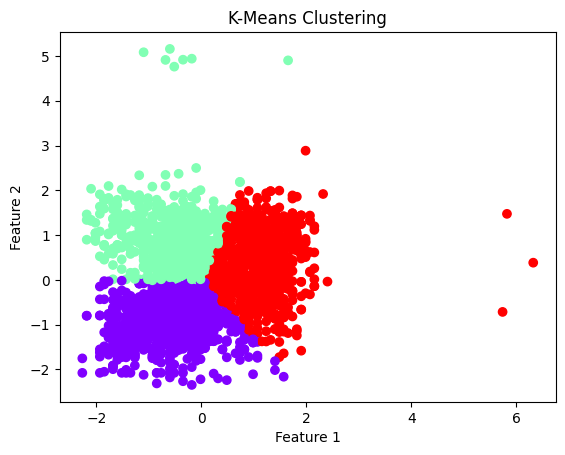

In [35]:
#visualizing the clusters
plt.scatter(scaled_data[:,0], scaled_data[:,1], c=labels, cmap='rainbow')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

In [36]:
#Evaluating the model
from sklearn.metrics import silhouette_score

score = silhouette_score(scaled_data, labels)
print('Silhouette Score: %.2f' % score)

Silhouette Score: 0.40


### Gaussian Mixture Model (GMM)

In [37]:
from sklearn.mixture import GaussianMixture as gmm

gmm = gmm(n_components=3, random_state=42)
gmm.fit(scaled_data)

#Get the cluster labels
labels = gmm.predict(scaled_data)

#Add the cluster labels to the original dataframe
mc_df2['Cluster'] = labels

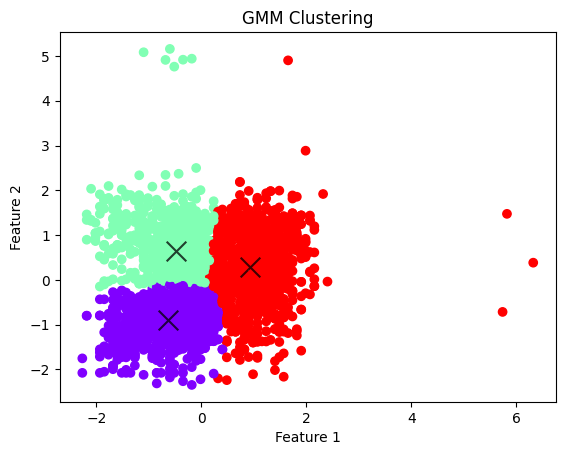

In [42]:
#Visualize the clusters
plt.scatter(scaled_data[:,0], scaled_data[:,1], c=labels, cmap='rainbow')

#Plot the cluster centers
centers = gmm.means_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.75, marker='x')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('GMM Clustering')
plt.show()

In [43]:
#Evaluating the model
score_gmm = silhouette_score(scaled_data, labels)
print('Silhouette Score: %.2f' % score_gmm)

Silhouette Score: 0.39


## **Save the Model**

Since the kmeans is the better model of the two I wiill save it for use next time.

In [44]:
#Save the kmeans model
from joblib import dump

#Save the K-Means model
dump(kmeans, 'kmeans_model.joblib')

['kmeans_model.joblib']

## **Conclusion**

The KMeans model produced a marginally better silhouette score of 0.40 against Gaussian Mixture that produced 0.39